# **Análise Exploratória de Dados - 2024** 🚀

* Projeto: **EDA - Análise Exploratória de Dados de Vendas Online**

* Curso: **Santander Coders 2023 | 2º Semestre**
* Módulo: **Técnicas de Programação I (PY)**
* **ADA Tech** em parceira com **Banco Santander**
* Facilitador: **Thiago**

<br>Aluno: **Anderson Miranda**
<br>ID: **1116003**


## **1. OBJETIVO:**

O objetivo deste projeto é aplicar os conhecimentos adquiridos ao longo da disciplina de Técnicas de Programação I em um contexto prático, relevante e data-driven.
Devendo realizar uma análise exploratória de dados de vendas online, utilizando um conjunto de dados real, a fim de extrair insights e entender melhor o fenômeno das vendas e de tudo aquilo que lhe diz respeito (clientes, fornecedores, produtos, pagamentos, etc.), usando apenas as bibliotecas Numpy e Pandas.


## **2. DATA SOURCE:**

**Vendas Online da Olist**

Este dataset foi generosamente cedido pela Olist, a maior loja de departamentos dos mercados brasileiros. Olist conecta pequenas empresas de todo o Brasil a canais sem complicações e com um único contrato. Esses comerciantes podem vender seus produtos através da Olist Store e enviá-los diretamente aos clientes usando os parceiros logísticos da Olist.

Depois que um cliente compra o produto na Olist Store, um vendedor é notificado para atender ao pedido. Assim que o cliente recebe o produto, ou vence a data estimada de entrega, o cliente recebe por e-mail uma pesquisa de satisfação onde pode dar uma nota da experiência de compra e anotar alguns comentários.

Fonte: [Kaggle - Vendas Online da Olist](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce)

## 1. **Carregamento Principal**

In [359]:
import pandas as pd
import numpy as np

In [360]:
# Define o path do dataset
path_dataset = "https://raw.githubusercontent.com/aluipio/ds_ada_santander_eda/main/dataset/"

# Carrega CSV
df_orders = pd.read_csv(path_dataset + "olist_orders_dataset.csv")
df_items = pd.read_csv(path_dataset + "olist_order_items_dataset.csv")
df_order_pay = pd.read_csv(path_dataset + "olist_order_payments_dataset.csv")
df_products = pd.read_csv(path_dataset + "olist_products_dataset.csv")
df_sellers = pd.read_csv(path_dataset + "olist_sellers_dataset.csv")
df_reviews = pd.read_csv(path_dataset + "olist_order_reviews_dataset.csv")
# df_geolocation = pd.read_csv(path_dataset + "olist_geolocation_dataset.csv")
# df_customers = pd.read_csv(path_dataset + "olist_customers_dataset.csv")
# df_category = pd.read_csv(path_dataset + "product_category_name_translation.csv")

Depois de analisado os datasets, vamos estruturar um DataFrame com os dados de Ordens, Itens, Pagamentos, Produtos e Vendas, para iniciar as analises.

In [361]:
# Mesclar DataFrame central com os periféricos
df_full = df_orders.merge(df_items, on='order_id', how='left')
df_full = df_full.merge(df_order_pay, on='order_id', how='outer', validate='m:m')
df_full = df_full.merge(df_products, on='product_id', how='outer')
df_full = df_full.merge(df_sellers, on='seller_id', how='outer')

In [362]:
df_full.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP


## 2. **Análise das informações**

In [363]:
# Dimensão da tabela
df_full.shape

(118434, 29)

In [364]:
# Visualizar informações do dataset
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118434 entries, 0 to 118433
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118434 non-null  object 
 1   customer_id                    118434 non-null  object 
 2   order_status                   118434 non-null  object 
 3   order_purchase_timestamp       118434 non-null  object 
 4   order_approved_at              118258 non-null  object 
 5   order_delivered_carrier_date   116360 non-null  object 
 6   order_delivered_customer_date  115037 non-null  object 
 7   order_estimated_delivery_date  118434 non-null  object 
 8   order_item_id                  117604 non-null  float64
 9   product_id                     117604 non-null  object 
 10  seller_id                      117604 non-null  object 
 11  shipping_limit_date            117604 non-null  object 
 12  price                         

In [365]:
# Visualizando parcela dos dados
df_full.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP


In [366]:
# Verificar a integridade dos dados
df_full.isna().sum() * 100  / df_full.shape[0]

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.148606
order_delivered_carrier_date     1.751186
order_delivered_customer_date    2.868264
order_estimated_delivery_date    0.000000
order_item_id                    0.700812
product_id                       0.700812
seller_id                        0.700812
shipping_limit_date              0.700812
price                            0.700812
freight_value                    0.700812
payment_sequential               0.002533
payment_type                     0.002533
payment_installments             0.002533
payment_value                    0.002533
product_category_name            2.134522
product_name_lenght              2.134522
product_description_lenght       2.134522
product_photos_qty               2.134522
product_weight_g                 0.717699
product_length_cm                0

Verifica-se que temos cerca de 3% dos dados faltando, vamos estruturar
* vamos remover as linhas com dados ausentes para analisar apenas os dados integros;
* vamos remover as colunas com código de referência ou identificador;

In [367]:
# Remoção de dados vazios
df = df_full.dropna()

# Remoção de colunas com código identifiador
df = df.drop(['order_id', 'order_item_id', 'product_id', 'seller_id'], axis=1)
df.shape

print("Total de linhas removidas:", df_full.shape[0] - df.shape[0])
print("Quantidade de dados depois da exclusão:", df.shape)

Total de linhas removidas: 5044
Quantidade de dados depois da exclusão: (113390, 25)


In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113390 entries, 0 to 118433
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    113390 non-null  object 
 1   order_status                   113390 non-null  object 
 2   order_purchase_timestamp       113390 non-null  object 
 3   order_approved_at              113390 non-null  object 
 4   order_delivered_carrier_date   113390 non-null  object 
 5   order_delivered_customer_date  113390 non-null  object 
 6   order_estimated_delivery_date  113390 non-null  object 
 7   shipping_limit_date            113390 non-null  object 
 8   price                          113390 non-null  float64
 9   freight_value                  113390 non-null  float64
 10  payment_sequential             113390 non-null  float64
 11  payment_type                   113390 non-null  object 
 12  payment_installments          

#### 2.1. Analisando os dados objects e categóricos

In [369]:
# Analisando os dados objects e categoricos
df.describe(include='object')

,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,payment_type,product_category_name,seller_city,seller_state
count,113390,113390,113390,113390,113390,113390,113390,113390,113390,113390,113390,113390
unique,95128,2,94624,87124,78920,94340,444,90127,4,73,588,22
top,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-12-20 00:00:00,2017-08-14 20:43:31,credit_card,cama_mesa_banho,sao paulo,SP
freq,63,113383,63,63,63,63,637,63,83706,11649,28297,80870


In [370]:
# Vamos analisar a distribuição dos status da ordem
df.order_status.value_counts(True)

delivered    0.999938
canceled     0.000062
Name: order_status, dtype: float64

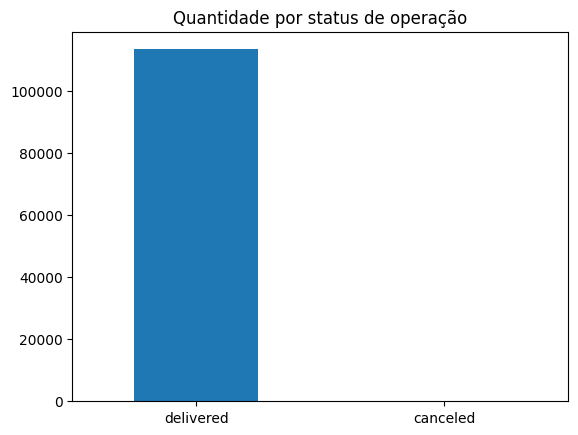

In [371]:
df.order_status.value_counts().plot.bar(rot=0, title='Quantidade por status de operação');

In [372]:
# Categoria de produtos cancelados
mask = df.order_status == 'canceled'
df[mask].product_category_name

45835                      brinquedos
47081                      perfumaria
47124                      perfumaria
47401                    beleza_saude
79756     fashion_bolsas_e_acessorios
100100                   beleza_saude
111105                  esporte_lazer
Name: product_category_name, dtype: object

In [373]:
# Vamos analisar a distribuição de product_category_name, dos 10 mair
analise = df.product_category_name.value_counts().iloc[:10]
analise

cama_mesa_banho           11649
beleza_saude               9761
esporte_lazer              8731
moveis_decoracao           8553
informatica_acessorios     7897
utilidades_domesticas      7172
relogios_presentes         6063
telefonia                  4601
ferramentas_jardim         4463
automotivo                 4283
Name: product_category_name, dtype: int64

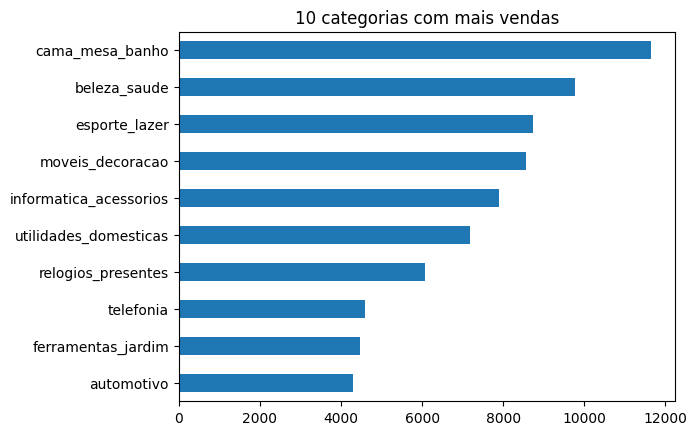

In [374]:
analise.sort_values().plot.barh(title='10 categorias com mais vendas');

In [375]:
# Vamos analisar a distribuição de payment_type
analise = df.payment_type.value_counts()
analise

credit_card    83706
boleto         22047
voucher         6012
debit_card      1625
Name: payment_type, dtype: int64

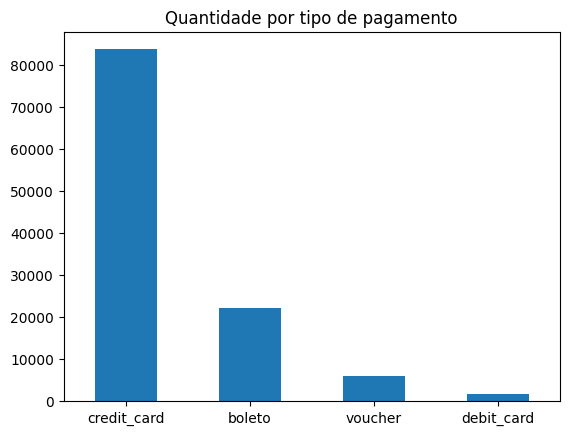

In [376]:
analise.plot.bar(rot=0, title="Quantidade por tipo de pagamento");

In [377]:
# Vamos analisar a distribuição de seller_city, as 10 mais.
analise = df.seller_city.value_counts().iloc[:10]
analise

sao paulo                28297
ibitinga                  8060
curitiba                  3043
santo andre               3015
sao jose do rio preto     2640
belo horizonte            2527
rio de janeiro            2373
ribeirao preto            2271
maringa                   2230
guarulhos                 2011
Name: seller_city, dtype: int64

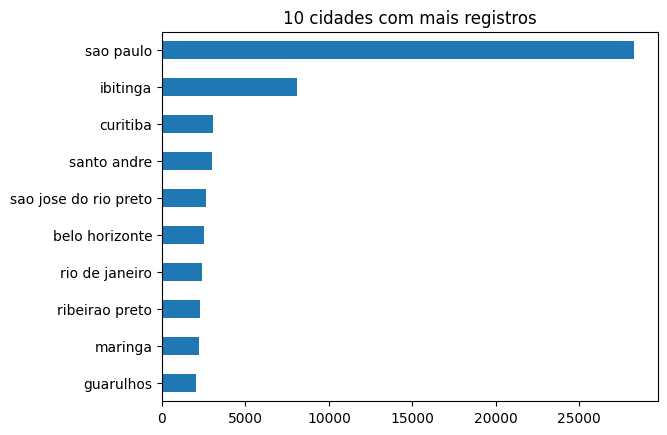

In [378]:
analise.sort_values().plot.barh(title="10 cidades com mais registros");

In [379]:
# Vamos analisar a distribuição de seller_state
analise = df.seller_state.value_counts()
analise

SP    80870
MG     8815
PR     8733
RJ     4798
SC     4160
RS     2203
DF      919
BA      679
GO      527
PE      462
MA      406
ES      371
MT      146
CE       99
MS       60
RN       56
PB       40
RO       14
PI       11
SE       10
PA        8
AM        3
Name: seller_state, dtype: int64

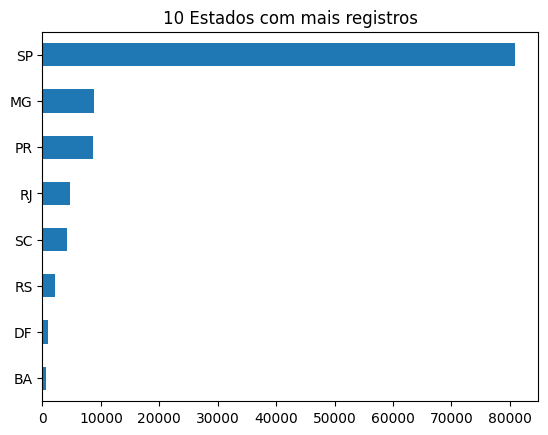

In [380]:
analise.iloc[:8].sort_values().plot.barh(title="10 Estados com mais registros");

Pela quantidade de dados unicos, e sua distribuição, podemos considerar as features, como colunas categoricas para nossa analise:
* payment_type
* product_category_name
* seller_city
* seller_state

Contudo, a feature **order_status** aparente ser pouco relevante, uma vez que pouquissimas operações foram canceladas.

#### 2.2 Analisando os dados numéricos

In [381]:
# Analisando os dados númericos
df.describe()

,price,freight_value,payment_sequential,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix
count,113390.000000,113390.000000,113390.000000,113390.000000,113390.000000,113390.000000,113390.000000,113390.000000,113390.000000,113390.000000,113390.000000,113390.000000,113390.000000
mean,120.184057,20.023985,1.089937,2.942367,172.241850,48.801755,785.793059,2.209375,2110.641917,30.281665,16.618635,23.099427,24510.930117
std,182.761548,15.752500,0.682057,2.777802,266.596347,10.018253,650.986313,1.720293,3770.379971,16.160708,13.447915,11.740315,27636.230916
min,0.850000,0.000000,1.000000,0.000000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000
25%,39.900000,13.080000,1.000000,1.000000,61.000000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000
50%,74.900000,16.320000,1.000000,2.000000,108.140000,52.000000,601.000000,1.000000,700.000000,25.000000,13.000000,20.000000,13660.000000
75%,133.732500,21.200000,1.000000,4.000000,189.370000,57.000000,985.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,28495.000000
max,6735.000000,409.680000,26.000000,24.000000,13664.080000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000


Análise de algumas features:

- **price**: a média do valor dos produtos é de R\$ 120.08, uma vez que os dados são operações realizadas no Brasil;
- **freight_value**: valor médio do frete foi de R\$ 20.00;
- **product_name_lenght**: trata-se da quantidade de letras do nome do produto, não tendo importância para nossa análise.

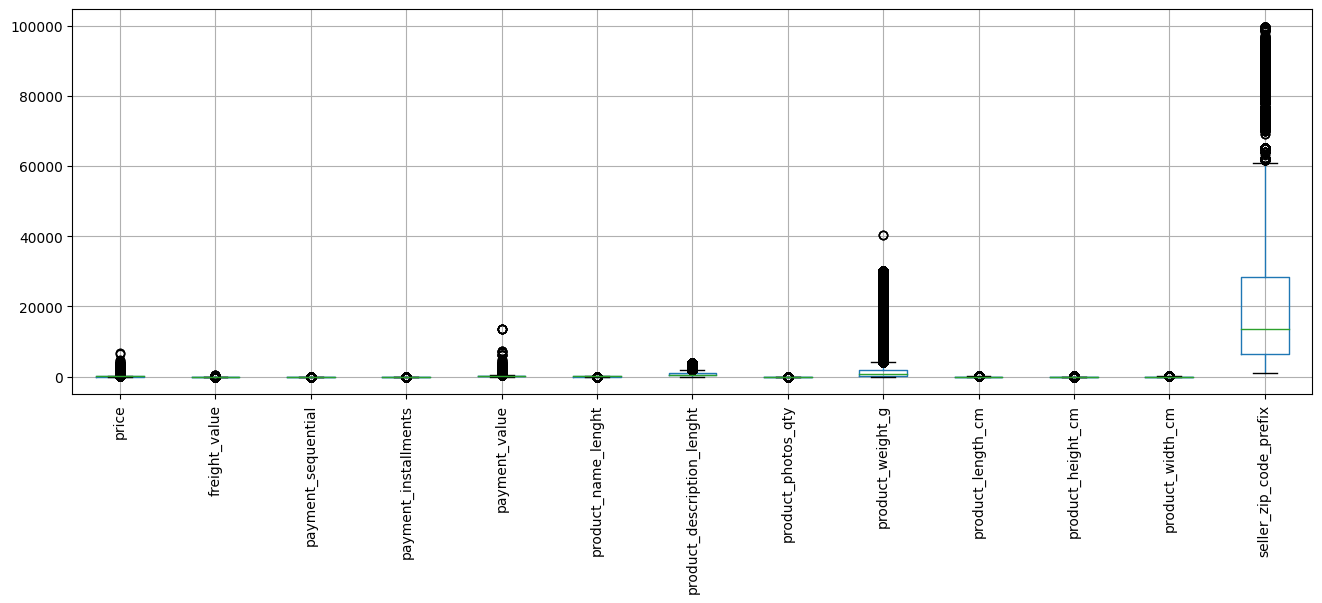

In [382]:
df.boxplot(rot=90, figsize=(16,5));

In [383]:
# Quantidade de produtos com valor acima da média
mask = df.price >= df.price.mean()
qtd_maior = df[mask].price.count()
print('Quantidade de produtos acima da média:', qtd_maior, '- Proporção:', qtd_maior*100 / df.shape[0], "%")

Quantidade de produtos acima da média: 31897 - Proporção: 28.130346591410177 %


In [384]:
# Quantidade de fretes com valor acima da média
mask = df.freight_value <= df.freight_value.mean()
qtd_maior = df[mask].freight_value.count()
print('Quantidade de Fretes abaixo:', qtd_maior, '- Proporção:', qtd_maior*100 / df.shape[0], "%")

Quantidade de Fretes abaixo: 81852 - Proporção: 72.18625981127083 %


# **Resposta aos quesitos**

---
## Pergunta 1: Há pagamentos do tipo “boleto” que tem mais de uma parcela?

In [385]:
# Quantidade de parcelas por tipo de pagamento
df_parcelas = df.groupby(['payment_type','payment_installments']).count()['order_status']
df_parcelas.unstack(level=0).T.fillna(0)

payment_installments,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,20.0,21.0,22.0,23.0,24.0
payment_type,,,,,,,,,,,,,,,,,,,,,
boleto,0.0,22047.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
credit_card,3.0,26813.0,13199.0,11331.0,7713.0,5827.0,4456.0,1743.0,4869.0,701.0,...,15.0,89.0,7.0,7.0,38.0,20.0,5.0,1.0,1.0,34.0
debit_card,0.0,1625.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
voucher,0.0,6012.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [386]:
# Quantidade de parcelas por tipo de pagamento, com outro recurso.
pd.crosstab(df.payment_type, df.payment_installments)

payment_installments,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,20.0,21.0,22.0,23.0,24.0
payment_type,,,,,,,,,,,,,,,,,,,,,
boleto,0,22047,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
credit_card,3,26813,13199,11331,7713,5827,4456,1743,4869,701,...,15,89,7,7,38,20,5,1,1,34
debit_card,0,1625,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
voucher,0,6012,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [387]:
# Quantidade de Boletos com mais de uma parcela
mask = (df.payment_type == 'boleto') & (df.payment_installments != 1)
print("Total de boletos com mais de uma parcela: ", df[mask].count().payment_type)

Total de boletos com mais de uma parcela:  0


<h4>Resposta: NÃO<h4>

---
## Pergunta 2:  Quais são exatamente os pagamentos que tem um valor maior ou menor do que o valor médio dos pagamentos registrados na tabela de pagamentos?

In [388]:
# Pagamento com valor MAIOR que a média
mask = df_order_pay.payment_value > df_order_pay.payment_value.mean()
print('Total de operações com pagamentos MAIOR que a média:', df_order_pay[mask].shape[0])
print('MAIOR pagamento:', df_order_pay['payment_value'].max())
df_order_pay[mask].head()

Total de operações com pagamentos MAIOR que a média: 31012
MAIOR pagamento: 13664.08


,order_id,payment_sequential,payment_type,payment_installments,payment_value
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09
10,d88e0d5fa41661ce03cf6cf336527646,1,credit_card,8,188.73
15,12e5cfe0e4716b59afb0e0f4a3bd6570,1,credit_card,10,157.45
18,8ac09207f415d55acff302df7d6a895c,1,credit_card,4,244.15
21,4214cda550ece8ee66441f459dc33a8c,1,credit_card,2,170.57


In [389]:
# Pagamento com valor MENOR que a média
mask = df_order_pay.payment_value < df_order_pay.payment_value.mean()
print('Total de operações com pagamentos MENOR que a média:', df_order_pay[mask].shape[0])
print('MENOR pagamento:', df_order_pay['payment_value'].min())
df_order_pay[mask].head()

Total de operações com pagamentos MENOR que a média: 72874
MENOR pagamento: 0.0


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


---
## Pergunta 3:  Quais são os clientes que provém de uma das 3 cidades mais comuns desta tabela?

In [390]:
# Três cidades mais comuns no dataset
cidades = df.seller_city.value_counts().iloc[:3]
cidades

sao paulo    28297
ibitinga      8060
curitiba      3043
Name: seller_city, dtype: int64

In [391]:
mask = df['seller_city'].isin(cidades.index)
print('Total de clientes das 3 cidade mais frequentes:', mask.sum())
print('Cidades:', list(cidades.index), '\n')
print('Clientes:')
df[mask]['customer_id'].head()

Total de clientes das 3 cidade mais frequentes: 39400
Cidades: ['sao paulo', 'ibitinga', 'curitiba'] 

Clientes:


2628    2f49811c845d9978f54ea3f61741516d
2629    dfbfddf21e93f87163d8695b85506112
2630    dfbfddf21e93f87163d8695b85506112
2631    dfbfddf21e93f87163d8695b85506112
2632    66d8f30fb4390d0b8d3e0b639bd367a9
Name: customer_id, dtype: object

---
## Pergunta 4: Criar um ndarray e adicioná-lo a alguma tabela como uma nova coluna.

#### 4.1. Tabela - df_products

In [392]:
# Verifica informações das features do DataFrame
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [393]:
# Recuperando medidas
prod_cumprimento = np.array(df_products.product_length_cm)
prod_altura = np.array(df_products.product_height_cm)
prod_largura = np.array(df_products.product_width_cm)

In [394]:
# Calculando o volume dos produtos
prod_volume = prod_cumprimento*prod_altura*prod_largura
prod_volume

array([ 2240., 10800.,  2430., ...,  5103.,  8060.,   168.])

In [395]:
# Medidas estatisticas
print("Tipo:", type(prod_volume))
print("Maximo:", np.max(prod_volume))
print("Mínimo:", np.min(prod_volume))
print("Média:", np.mean(prod_volume))
print("Mediana:", np.median(prod_volume))
print("Desvio Padrão:", np.std(prod_volume))
print("Variância:", np.var(prod_volume))

Tipo: <class 'numpy.ndarray'>
Maximo: nan
Mínimo: nan
Média: nan
Mediana: nan
Desvio Padrão: nan
Variância: nan


In [396]:
print("Quantidade de NaN:", np.isnan(prod_volume).sum())

Quantidade de NaN: 2


In [397]:
# Medidas estatisticas
print("Tipo:", type(prod_volume))
print("Maximo:", np.nanmax(prod_volume))
print("Mínimo:", np.nanmin(prod_volume))
print("Média:", np.nanmean(prod_volume))
print("Mediana:", np.nanmedian(prod_volume))
print("Desvio Padrão:", np.nanstd(prod_volume))
print("Variância:", np.nanvar(prod_volume))

Tipo: <class 'numpy.ndarray'>
Maximo: 296208.0
Mínimo: 168.0
Média: 16564.096694892105
Mediana: 6840.0
Desvio Padrão: 27056.631057479794
Variância: 732061284.1805801


In [398]:
# Medidas de Quartil
print("Quartil 25:", np.nanquantile(prod_volume, 0.25))
print("Quartil 50:", np.nanquantile(prod_volume, 0.5))
print("Quartil 75:", np.nanquantile(prod_volume, 0.75))

Quartil 25: 2880.0
Quartil 50: 6840.0
Quartil 75: 18480.0


In [399]:
# Inserir nova feature, ndArray, no DataFrame
df_products['product_volume'] = prod_volume

In [400]:
# Cria um array para descrição, com mesma dimensão do array de volumes
prod_volume_desc = np.array(['INDEFINIDO']*prod_volume.shape[0])

# Cria mascaras para os tamanhos
mask_pequeno = prod_volume <= np.nanquantile(prod_volume, 0.25)
mask_medio = (prod_volume > np.nanquantile(prod_volume, 0.25)) & (prod_volume < np.nanquantile(prod_volume, 0.75))
mask_grande = prod_volume >= np.nanquantile(prod_volume, 0.75)

# Descreve os tamanhos
prod_volume_desc[mask_pequeno] = 'PEQUENO'
prod_volume_desc[mask_medio] = 'MÉDIO'
prod_volume_desc[mask_grande] = 'GRANDE'

prod_volume_desc

array(['PEQUENO', 'MÉDIO', 'PEQUENO', ..., 'MÉDIO', 'MÉDIO', 'PEQUENO'],
      dtype='<U10')

In [401]:
# Inserir nova feature de descrição, ndArray, no DataFrame
df_products['product_volume_desc'] = prod_volume_desc

In [402]:
# Visualizando dados
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume,product_volume_desc
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,2240.0,PEQUENO
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,10800.0,MÉDIO
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,2430.0,PEQUENO
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,2704.0,PEQUENO
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,4420.0,MÉDIO


#### 4.2. Tabela - df_reviews

In [403]:
# Visualiza informações de tabela
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [404]:
# Visualiza tabela
df_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [405]:
# Conta conforme a nota
df_reviews.review_score.value_counts()

5    57328
4    19142
1    11424
3     8179
2     3151
Name: review_score, dtype: int64

In [406]:
# Cria ndArray
rev_score = np.array(df_reviews['review_score'])
rev_score

array([4, 5, 5, ..., 5, 4, 1])

In [407]:
# Criar coluna de booleanos que indique se a avaliação atingiu o valor mais alto (5) ou não.
mask = rev_score == 5
mask

# Cria novo ndArray
rev_score_desc = np.array(['NÃO']*rev_score.shape[0])
rev_score_desc[mask] = 'SIM'

rev_score_desc

array(['NÃO', 'SIM', 'SIM', ..., 'SIM', 'NÃO', 'NÃO'], dtype='<U3')

In [408]:
# Inserir nova feature de descrição, ndArray, no DataFrame
df_reviews['review_score_5'] = rev_score_desc

In [409]:
df_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_score_5
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,NÃO
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,SIM
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,SIM
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,SIM
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,SIM


## Trabalho concluído.